# Data Understanding & Explore Dataset


## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import lightgbm as lgb
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

warnings.filterwarnings('ignore')


## Load Data

In [ ]:
df = pd.read_csv('/content/Crime Prediction in Chicago_Dataset.csv')
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12592454,JF113025,1/14/2022 15:55,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,12785595,JF346553,8/5/2022 21:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,12808281,JF373517,8/14/2022 14:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
3,12888104,JF469015,11/10/2022 3:47,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,17.0,68,15,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)"
4,13209277,JG422539,8/15/2022 9:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,...,4.0,32,6,NaN,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239553,27038,JF387886,9/8/2022 10:50,061XX N WINTHROP AVE,110,HOMICIDE,FIRST DEGREE MURDER,PORCH,True,False,...,48.0,77,01A,1167747.0,1940929.0,2022,12/29/2022 15:40,41.993457,-87.658318,"(41.993457327, -87.658318065)"
239554,26819,JF275138,6/10/2022 23:41,018XX S CANAL ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,25.0,31,01A,1173423.0,1891309.0,2022,9/19/2022 15:41,41.857173,-87.638918,"(41.857173304, -87.638917814)"
239555,26601,JF132803,2/3/2022 16:27,000XX E 100TH PL,110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,...,9.0,49,01A,1178641.0,1838358.0,2022,9/19/2022 15:41,41.711753,-87.621374,"(41.711753121, -87.621374343)"
239556,26857,JF290575,6/23/2022 2:25,027XX S KEDVALE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,22.0,30,01A,1149162.0,1885416.0,2022,9/1/2022 15:42,41.841506,-87.728122,"(41.841506072, -87.728122297)"


**Background**


Kota Chicago mengalami fluktuasi jumlah kejahatan sepanjang tahun. Pihak pemangku kebijakan ingin menyusun strategi pencegahan yang berbasis data, bukan sekadar reaktif. Diperlukan analisis tren dan pola musiman agar penempatan patroli, kampanye keamanan, serta alokasi anggaran dapat dilakukan lebih efektif dan tepat waktu. Data ini memiliki rentang waktu pada tahun 2022-2023.

Column Description

- ID – Unique identifier for each crime record.
- Case Number – The police case number associated with the crime.
- Date – The date and time when the crime occurred.
- Block – The location block where the crime took place.
- IUCR – Illinois Uniform Crime Reporting (IUCR) code for the crime.
- Primary Type – The category of crime (e.g., THEFT, BATTERY, ASSAULT).
- Description – A more specific description of the crime type.
- Location Description – Where the crime occurred (e.g., STREET, APARTMENT).
- Arrest – Indicates whether an arrest was made (True/False).
- Domestic – Whether the crime was domestic-related (True/False).
- Beat – A specific police patrol area.
- District – The larger police district in which the crime occurred.
- Ward – The political ward where the crime was reported.
- Community Area – The community designation for the crime location.
- FBI Code – FBI classification code for the type of offense.
- X Coordinate, Y Coordinate – Geospatial coordinates in the city system.
- Latitude, Longitude – GPS coordinates for crime mapping.
- Updated On – The date when the crime record was last updated.

## Check Data

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239558 non-null  int64  
 1   Case Number           239558 non-null  object 
 2   Date                  239558 non-null  object 
 3   Block                 239558 non-null  object 
 4   IUCR                  239558 non-null  object 
 5   Primary Type          239558 non-null  object 
 6   Description           239558 non-null  object 
 7   Location Description  238593 non-null  object 
 8   Arrest                239558 non-null  bool   
 9   Domestic              239558 non-null  bool   
 10  Beat                  239558 non-null  int64  
 11  District              239558 non-null  int64  
 12  Ward                  239548 non-null  float64
 13  Community Area        239558 non-null  int64  
 14  FBI Code              239558 non-null  object 
 15  

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.395580e+05,239558.000000,239558.00000,239548.000000,239558.000000,2.348910e+05,2.348910e+05,239558.0,234891.000000,234891.000000
mean,1.273144e+07,1154.023276,11.31053,23.385029,36.268474,1.165381e+06,1.887038e+06,2022.0,41.845612,-87.668599
std,7.082019e+05,707.909870,7.07555,14.210565,21.553814,1.679375e+04,3.229564e+04,0.0,0.088833,0.061010
min,2.654300e+04,111.000000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00,2022.0,36.619446,-91.686566
25%,1.267802e+07,533.000000,5.00000,9.000000,22.000000,1.153949e+06,1.859284e+06,2022.0,41.769168,-87.710150
50%,1.276893e+07,1033.000000,10.00000,24.000000,32.000000,1.167256e+06,1.893383e+06,2022.0,41.863073,-87.661465
75%,1.285704e+07,1731.000000,17.00000,35.000000,53.000000,1.176856e+06,1.910066e+06,2022.0,41.909023,-87.626402
max,1.363051e+07,2535.000000,31.00000,50.000000,77.000000,1.205119e+06,1.951493e+06,2022.0,42.022548,-87.524532


# Data Cleaning

## Check and Handling Null Data

In [ ]:
df.isnull().sum() / len(df) * 100

,0
ID,0.000000
Case Number,0.000000
Date,0.000000
Block,0.000000
IUCR,0.000000
Primary Type,0.000000
Description,0.000000
Location Description,0.402825
Arrest,0.000000
Domestic,0.000000


**Insight** : Terdapat missing values tetapi tidak dihapus karena nantinya kolomnya akan dihapus saat melakukan forecasting.

## Check and Handling Duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

**Insight** : Tidak ada duplikat pada data.

## Check and Handling Outliers

In [ ]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.395580e+05,239558.000000,239558.00000,239548.000000,239558.000000,2.348910e+05,2.348910e+05,239558.0,234891.000000,234891.000000
mean,1.273144e+07,1154.023276,11.31053,23.385029,36.268474,1.165381e+06,1.887038e+06,2022.0,41.845612,-87.668599
std,7.082019e+05,707.909870,7.07555,14.210565,21.553814,1.679375e+04,3.229564e+04,0.0,0.088833,0.061010
min,2.654300e+04,111.000000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00,2022.0,36.619446,-91.686566
25%,1.267802e+07,533.000000,5.00000,9.000000,22.000000,1.153949e+06,1.859284e+06,2022.0,41.769168,-87.710150
50%,1.276893e+07,1033.000000,10.00000,24.000000,32.000000,1.167256e+06,1.893383e+06,2022.0,41.863073,-87.661465
75%,1.285704e+07,1731.000000,17.00000,35.000000,53.000000,1.176856e+06,1.910066e+06,2022.0,41.909023,-87.626402
max,1.363051e+07,2535.000000,31.00000,50.000000,77.000000,1.205119e+06,1.951493e+06,2022.0,42.022548,-87.524532


**Insight** : Tidak dilakukan handling apapun mengenai outlier karena data pelaporan kejahatan ini bersifat fluktuatif.

# Data Manipulation

## Change Data Type

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    239558 non-null  int64         
 1   Case Number           239558 non-null  object        
 2   Date                  239558 non-null  datetime64[ns]
 3   Block                 239558 non-null  object        
 4   IUCR                  239558 non-null  object        
 5   Primary Type          239558 non-null  object        
 6   Description           239558 non-null  object        
 7   Location Description  238593 non-null  object        
 8   Arrest                239558 non-null  bool          
 9   Domestic              239558 non-null  bool          
 10  Beat                  239558 non-null  int64         
 11  District              239558 non-null  int64         
 12  Ward                  239548 non-null  float64       
 13 

## New Column

In [ ]:
# Buat kolom Year-Month
df['YearMonth'] = df['Date'].dt.to_period('M')

# Exploratory Data Analysis

## Monthly Crime Cases Distribution

In [ ]:
# kasus per bulan
cases_per_month = df.groupby('YearMonth').size().reset_index(name='Total_Cases')
cases_per_month

,YearMonth,Total_Cases
0,2022-01,15697
1,2022-02,15264
2,2022-03,18417
3,2022-04,18040
4,2022-05,20182
5,2022-06,20833
6,2022-07,22325
7,2022-08,22351
8,2022-09,22383
9,2022-10,23253


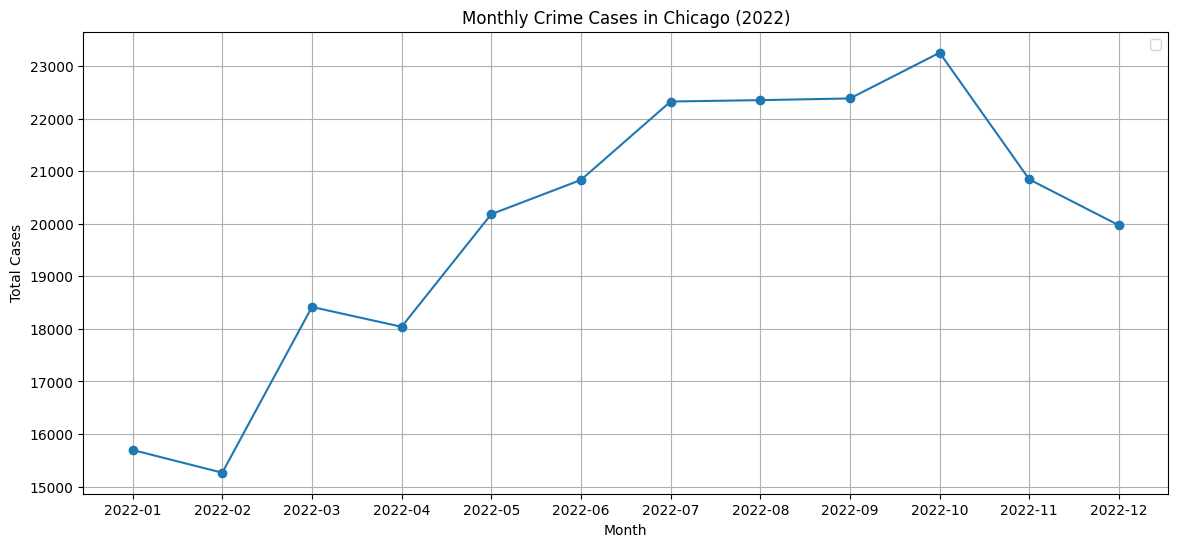

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(cases_per_month['YearMonth'].astype(str), cases_per_month['Total_Cases'], marker ='o')
plt.title("Monthly Crime Cases in Chicago (2022)")
plt.xlabel("Month")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.show()

**Insight** : Kasus kriminal menaik seiring berjalannya bulan. Puncak kasus kriminal tertinggi berada pada bulan Oktober.

## Primary Type

In [ ]:
# top 10 primary type
top_10_primary_type = df['Primary Type'].value_counts().head(10).sort_values(ascending=True)
top_10_primary_type.sort_values(ascending=False)

,count
Primary Type,
THEFT,54886
BATTERY,40946
CRIMINAL DAMAGE,27248
MOTOR VEHICLE THEFT,21463
ASSAULT,20809
DECEPTIVE PRACTICE,16854
OTHER OFFENSE,14609
ROBBERY,8963
WEAPONS VIOLATION,8780


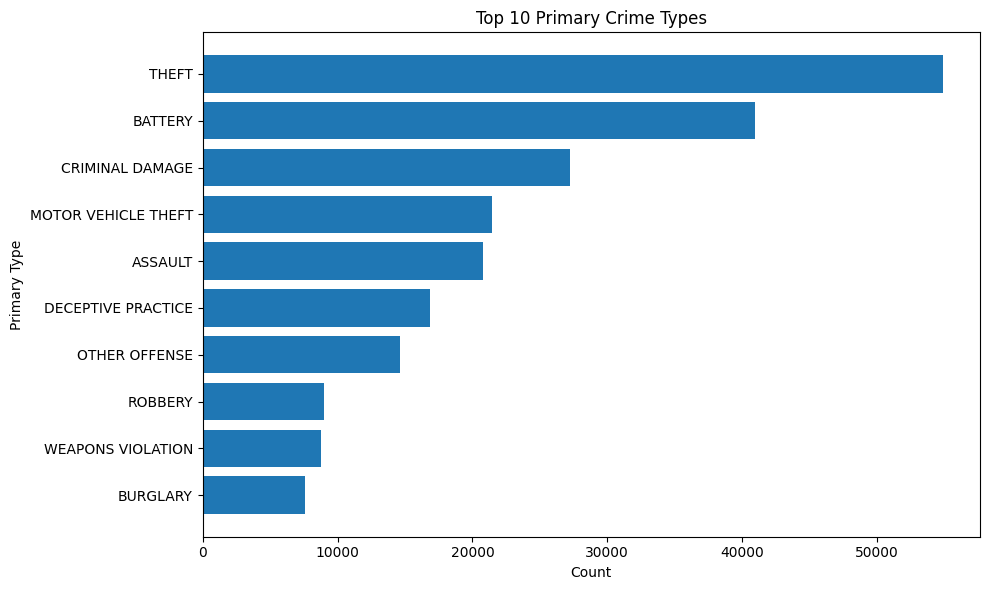

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(top_10_primary_type.index, top_10_primary_type.values)
plt.title('Top 10 Primary Crime Types')
plt.xlabel('Count')
plt.ylabel('Primary Type')
plt.tight_layout()
plt.show()

**Insight** : Kriminal dengan tipe 'Theft' atau pencurian merupakan jenis tipe kriminal yang sering terjadi.

## Theft Crimes Type

In [ ]:
theft_df = df[df['Primary Type'] == 'THEFT']

top_5_theft_descriptions = theft_df['Description'].value_counts().head(5).sort_values(ascending=True)

top_5_theft_descriptions.sort_values(ascending=False)

,count
Description,
OVER $500,20112
$500 AND UNDER,18882
RETAIL THEFT,8729
FROM BUILDING,4794
POCKET-PICKING,1620


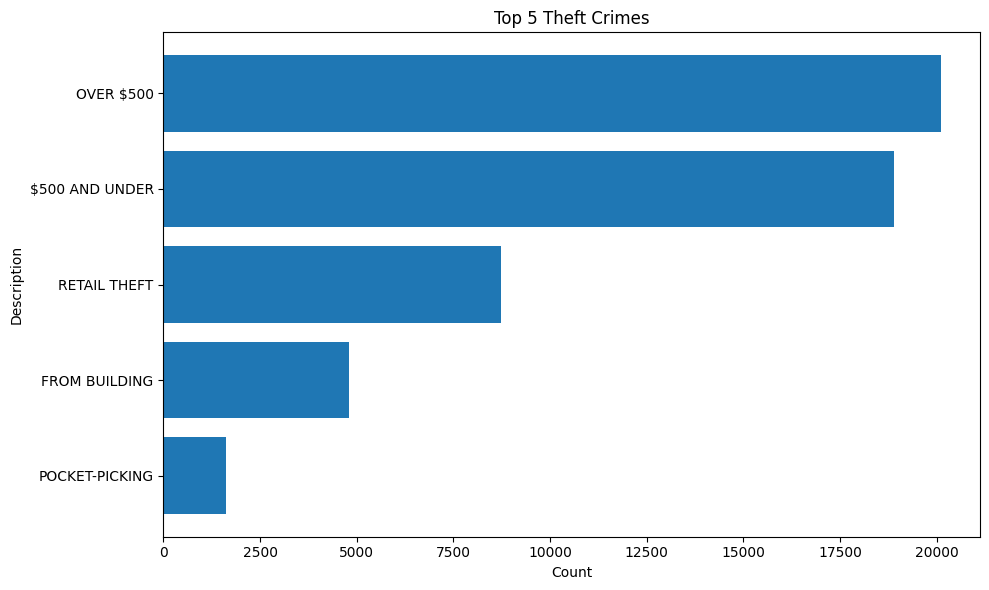

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_5_theft_descriptions.index, top_5_theft_descriptions.values)
plt.title('Top 5 Theft Crimes')
plt.xlabel('Count')
plt.ylabel('Description')
plt.tight_layout()
plt.show()

**Insight** : Jenis tipe kriminal pencurian tertinggi yang sering terjadi adalah pencurian uang over 500$.

## Crime Location

In [ ]:
top_10_location_description = df['Location Description'].value_counts().head(10).sort_values(ascending=True)
top_10_location_description.sort_values(ascending=False)

,count
Location Description,
STREET,67640
APARTMENT,45748
RESIDENCE,30603
SIDEWALK,12059
PARKING LOT / GARAGE (NON RESIDENTIAL),9333
SMALL RETAIL STORE,7261
ALLEY,5019
RESTAURANT,4867
OTHER (SPECIFY),3629


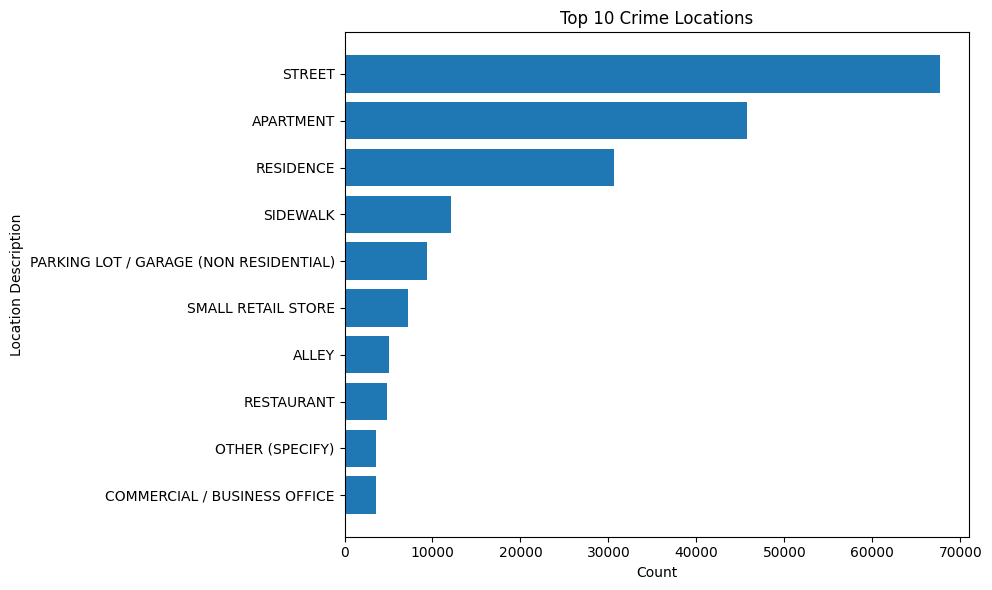

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_location_description.index, top_10_location_description.values)
plt.title('Top 10 Crime Locations')
plt.xlabel('Count')
plt.ylabel('Location Description')
plt.tight_layout()
plt.show()

**Insight** : Tempat terjadinya kriminal tertinggi berada di Street.

## Block Location

,count
Block,
001XX N STATE ST,604
0000X W TERMINAL ST,575
100XX W OHARE ST,342
003XX E RANDOLPH ST,325
0000X N STATE ST,276
0000X E GRAND AVE,260
012XX S WABASH AVE,253
026XX N CLARK ST,246
057XX S CICERO AVE,230


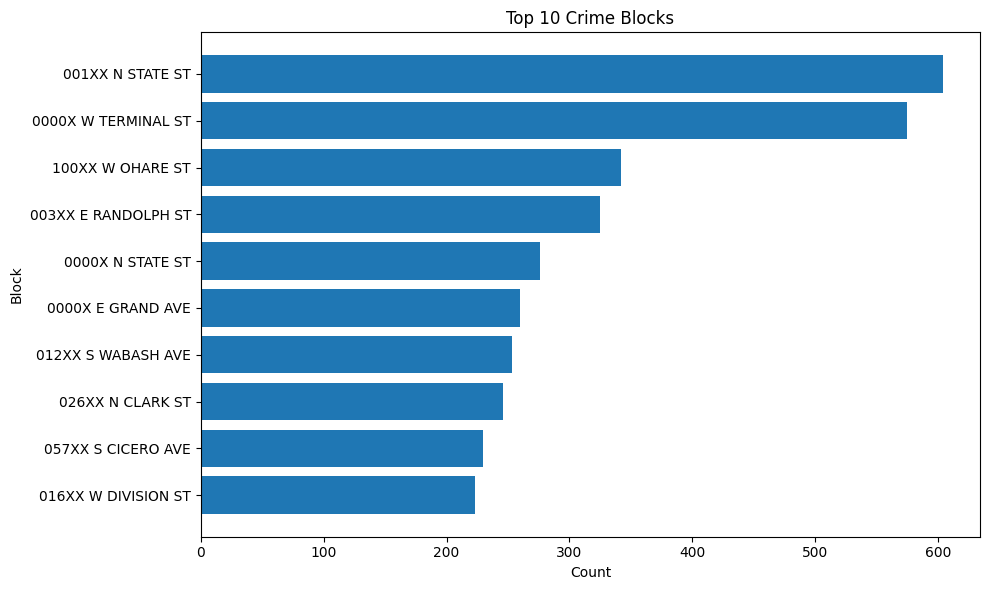

In [ ]:
top_10_blocks = df['Block'].value_counts().head(10).sort_values(ascending=True)
display(top_10_blocks.sort_values(ascending=False))

plt.figure(figsize=(10, 6))
plt.barh(top_10_blocks.index, top_10_blocks.values)
plt.title('Top 10 Crime Blocks')
plt.xlabel('Count')
plt.ylabel('Block')
plt.tight_layout()
plt.show()

**Insight** = Lokasi kejadian terjadinya kejahatan/kriminal tertinggi berada di block 001XX N State ST dengan jumlah 604 kasus.

## Domestic Distribution


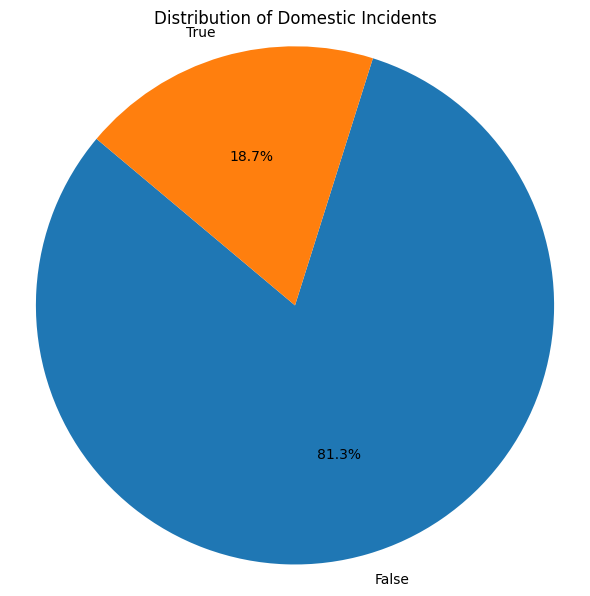

In [ ]:
domestic_counts = df['Domestic'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(domestic_counts, labels=domestic_counts.index.astype(str), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Domestic Incidents')
plt.axis('equal')
plt.tight_layout()
plt.show()

**Insight** : Sebanyak 81.3% kriminal berasal dari luar lingkup rumah tangga.

## Arrest Distribution


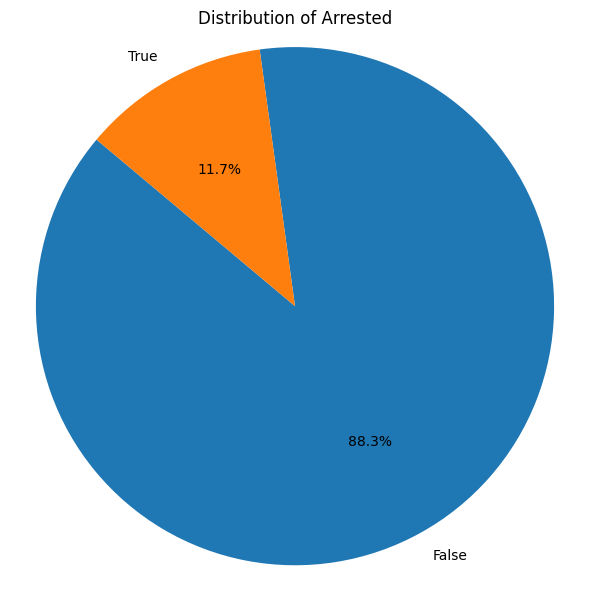

In [ ]:
arrest_counts = df['Arrest'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(arrest_counts, labels=arrest_counts.index.astype(str), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Arrested')
plt.axis('equal')
plt.tight_layout()
plt.show()

**Insight** : Sebanyak 88.3% pelaku kriminal tidak tertangkap.

## Stationarity Test (Augmented Dickey-Fuller Test - ADF))

In [ ]:
# Agregasi: hitung jumlah kasus per hari
daily_crime = df.groupby(df['Date'].dt.date).size().to_frame('Total_Crimes')
daily_crime.index = pd.to_datetime(daily_crime.index)


# Uji Stasioneritas - ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(daily_crime['Total_Crimes'].dropna()) # Apply ADF test to the 'Total_Crimes' column
print("== ADF Test ==")
print(f"ADF Statistic : {result[0]}")
print(f"p-value       : {result[1]}")
print("Num Of Lags   : ", dftest[2])
for key, value in result[4].items():
    print(f"Critical Value ({key}) : {value}")
if result[1] <= 0.05:
    print("Kesimpulan: Data stasioner (tolak H0)")
else:
    print("Kesimpulan: Data tidak stasioner (gagal tolak H0)")

== ADF Test ==
ADF Statistic : -2.7762387907706536
p-value       : 0.06174886550203477
Num Of Lags   :  6
Critical Value (1%) : -3.448748905151901
Critical Value (5%) : -2.8696473721448728
Critical Value (10%) : -2.5710891239349585
Kesimpulan: Data tidak stasioner (gagal tolak H0)


## Plot Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF)

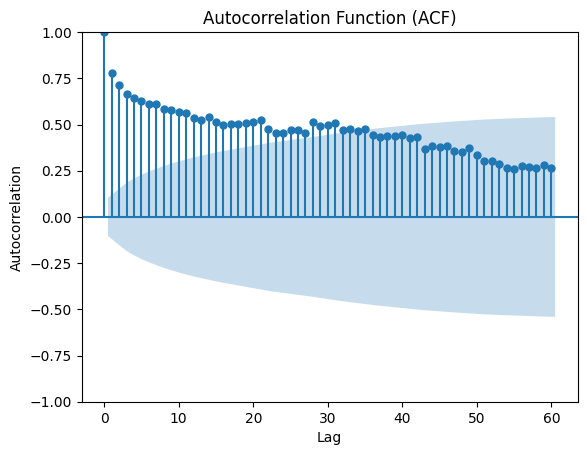

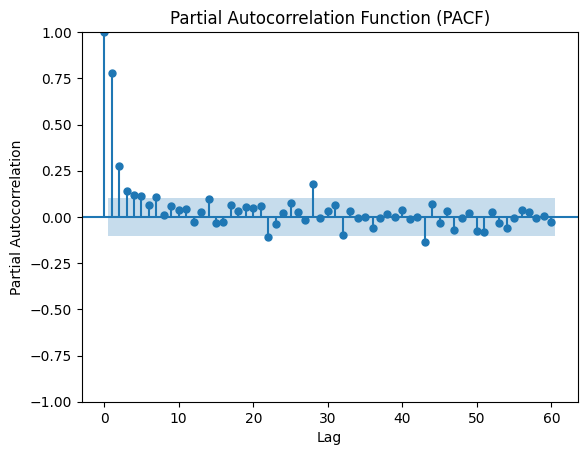

In [ ]:
# Membuat Plot ACF and PACF (kalau pakai auto ARIMA gausah pakai ini)
# Plot ACF
plot_acf(daily_crime['Total_Crimes'], lags=60)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plot_pacf(daily_crime['Total_Crimes'], lags=60)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Feature Engineering

In [ ]:
# Pastikan kolom Date jadi datetime
df['Date'] = pd.to_datetime(df['Date'])


# Feature Engineering Waktu & Kalender
def create_time_features_crime(df_input):
    df_output = df_input.copy()
    df_output.index = pd.to_datetime(df_output.index)

    # Calendar features
    df_output['year'] = df_output.index.year
    df_output['month'] = df_output.index.month
    df_output['day'] = df_output.index.day
    df_output['dayofweek'] = df_output.index.dayofweek
    df_output['dayofyear'] = df_output.index.dayofyear
    df_output['weekofyear'] = df_output.index.isocalendar().week.astype(int)
    df_output['quarter'] = df_output.index.quarter
    df_output['is_weekend'] = (df_output.index.dayofweek >= 5).astype(int)

    # Cyclical encoding
    df_output['dayofweek_sin'] = np.sin(2 * np.pi * df_output['dayofweek']/7)
    df_output['dayofweek_cos'] = np.cos(2 * np.pi * df_output['dayofweek']/7)
    df_output['dayofyear_sin'] = np.sin(2 * np.pi * df_output['dayofyear']/365)
    df_output['dayofyear_cos'] = np.cos(2 * np.pi * df_output['dayofyear']/365)
    df_output['month_sin'] = np.sin(2 * np.pi * df_output['month']/12)
    df_output['month_cos'] = np.cos(2 * np.pi * df_output['month']/12)

    return df_output


# Lag & Rolling untuk target (jumlah kasus)
def create_lag_rolling_features_crime(df_input):
    df_temp = df_input.copy()
    target_col = 'Total_Crimes'

    # Lag features
    df_temp[f'{target_col}_lag_1'] = df_temp[target_col].shift(1)
    df_temp[f'{target_col}_lag_7'] = df_temp[target_col].shift(7)
    df_temp[f'{target_col}_lag_30'] = df_temp[target_col].shift(30)

    # Rolling statistics
    df_temp[f'{target_col}_rolling_mean_7'] = df_temp[target_col].rolling(window=7, min_periods=1).mean()
    df_temp[f'{target_col}_rolling_std_7'] = df_temp[target_col].rolling(window=7, min_periods=1).std()
    df_temp[f'{target_col}_rolling_mean_30'] = df_temp[target_col].rolling(window=30, min_periods=1).mean()

    return df_temp


# Terapkan ke data crime
crime_features = create_time_features_crime(daily_crime)
crime_features = create_lag_rolling_features_crime(crime_features)

# Isi NaN akibat lag/rolling
crime_features.fillna(crime_features.mean(), inplace=True)

print(f"Ukuran data setelah feature engineering: {crime_features.shape}")
crime_features.head()

Ukuran data setelah feature engineering: (365, 21)


,Total_Crimes,year,month,day,dayofweek,dayofyear,weekofyear,quarter,is_weekend,dayofweek_sin,...,dayofyear_sin,dayofyear_cos,month_sin,month_cos,Total_Crimes_lag_1,Total_Crimes_lag_7,Total_Crimes_lag_30,Total_Crimes_rolling_mean_7,Total_Crimes_rolling_std_7,Total_Crimes_rolling_mean_30
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,817,2022,1,1,5,1,52,1,1,-0.974928,...,0.017213,0.999852,0.5,0.866025,656.137363,657.558659,657.791045,817.000000,48.048857,817.000000
2022-01-02,409,2022,1,2,6,2,52,1,1,-0.781831,...,0.034422,0.999407,0.5,0.866025,817.000000,657.558659,657.791045,613.000000,288.499567,613.000000
2022-01-03,423,2022,1,3,0,3,1,1,0,0.000000,...,0.051620,0.998667,0.5,0.866025,409.000000,657.558659,657.791045,549.666667,231.623257,549.666667
2022-01-04,473,2022,1,4,1,4,1,1,0,0.781831,...,0.068802,0.997630,0.5,0.866025,423.000000,657.558659,657.791045,530.500000,192.965455,530.500000
2022-01-05,421,2022,1,5,2,5,1,1,0,0.974928,...,0.085965,0.996298,0.5,0.866025,473.000000,657.558659,657.791045,508.600000,174.140173,508.600000


In [ ]:
# --- Persiapan data Crime untuk pemodelan ---

# Rasio split
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

total_days = len(crime_features)
train_size = int(total_days * train_ratio)
val_size = int(total_days * val_ratio)
test_size = total_days - train_size - val_size

# Tentukan tanggal split (informasi)
split_date_val = crime_features.index[train_size - 1]
split_date_test = crime_features.index[train_size + val_size - 1]

# Target
target_col = 'Total_Crimes'

# Fitur untuk Machine Learning (semua kecuali target)
ml_features = [col for col in crime_features.columns if col != target_col and '_adjusted' not in col]

# --- Split untuk Machine Learning ---
X_train_ml = crime_features.iloc[:train_size][ml_features]
y_train_ml = crime_features.iloc[:train_size][target_col]

X_val_ml = crime_features.iloc[train_size:train_size + val_size][ml_features]
y_val_ml = crime_features.iloc[train_size:train_size + val_size][target_col]

X_test_ml = crime_features.iloc[train_size + val_size:][ml_features]
y_test_ml = crime_features.iloc[train_size + val_size:][target_col]

# --- Split untuk Time Series klasik (ARIMA, SARIMAX, Prophet, dsb.) ---
y_train_ts = daily_crime[target_col].iloc[:train_size]
y_val_ts = daily_crime[target_col].iloc[train_size:train_size + val_size]
y_test_ts = daily_crime[target_col].iloc[train_size + val_size:]

# Exogenous features untuk TS model
exog_cols_ts = [
    'year', 'month', 'day', 'dayofweek', 'dayofyear',
    'weekofyear', 'quarter', 'is_weekend',
    'dayofweek_sin', 'dayofweek_cos',
    'dayofyear_sin', 'dayofyear_cos',
    'month_sin', 'month_cos'
]

# Hanya ambil kolom yang ada
exog_cols_ts_filtered = [col for col in exog_cols_ts if col in crime_features.columns]

exog_train_ts = crime_features[exog_cols_ts_filtered].iloc[:train_size]
exog_val_ts = crime_features[exog_cols_ts_filtered].iloc[train_size:train_size + val_size]
exog_test_ts = crime_features[exog_cols_ts_filtered].iloc[train_size + val_size:]

# Info ukuran dataset
print(f"Ukuran Data Training ML: {len(X_train_ml)} hari")
print(f"Ukuran Data Validation ML: {len(X_val_ml)} hari")
print(f"Ukuran Data Testing ML: {len(X_test_ml)} hari")
print(f"Ukuran Data Training TS: {len(y_train_ts)} hari")
print(f"Ukuran Data Validation TS: {len(y_val_ts)} hari")
print(f"Ukuran Data Testing TS: {len(y_test_ts)} hari")


Ukuran Data Training ML: 219 hari
Ukuran Data Validation ML: 73 hari
Ukuran Data Testing ML: 73 hari
Ukuran Data Training TS: 219 hari
Ukuran Data Validation TS: 73 hari
Ukuran Data Testing TS: 73 hari


# Modelling

In [ ]:
# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred, model_name):
    # Memastikan prediksi tidak negatif (karena konsumsi daya tidak mungkin negatif)
    y_pred = np.maximum(0, y_pred) # Konsumsi tidak bisa negatif
    # Menghitung Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    # Menghitung Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    # Menghitung Mean Absolute Percentage Error (MAPE)
    # Menghindari pembagian dengan nol jika ada nilai aktual 0
    y_true_cleaned = y_true.copy()
    y_true_cleaned[y_true_cleaned == 0] = 1e-9 # Ganti 0 dengan small number untuk menghindari pembagian angka 0

    mape = np.mean(np.abs((y_true - y_pred) / y_true_cleaned)) * 100
    print(f"--- {model_name} ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.2f}%")

    return rmse, mae, mape

# Fungsi untuk visualisasi perbandingan forecast vs. aktual (gabikin juga gapapa)
def plot_predictions(y_train, y_val, y_test, y_pred_val, y_pred_test, model_name):
    plt.figure(figsize=(15, 6))
    plt.plot(y_train.index, y_train, label='Data Historis (Train)', color='blue', alpha=0.7)

    if y_val is not None:
      plt.plot(y_val.index, y_val, label='Data Validasi (Aktual)', color='black', linewidth=2)
      if y_pred_val is not None:
        y_pred_val_series = pd.Series(y_pred_val, index=y_val.index)
        plt.plot(y_val.index, y_pred_val_series, label=f'Prediksi {model_name} (Validasi)', linestyle='--', color='red')


    if y_test is not None:
      plt.plot(y_test.index, y_test, label='Data Testing (Aktual)', color='green', linewidth=2)
      if y_pred_test is not None:
        y_pred_test_series = pd.Series(y_pred_test, index=y_test.index)
        plt.plot(y_test.index, y_pred_test_series, label=f'Prediksi {model_name} (Testing)', linestyle='--', color='orange')


    plt.title(f'Prediksi {model_name} vs. Aktual', fontsize=16)
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Crime', fontsize=12)

    plt.axvline(x=y_train.index.max(), color='grey', linestyle=':', label='Akhir Data Historis')

    if y_val is not None and len(y_val) > 0:
      plt.axvline(x=y_val.index.max(), color='gray', linestyle='--', label='Akhir Data Validasi')

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Holt-Winters

--- Holt-Winters (Validation) ---
RMSE: 61.2264
MAE: 49.8512
MAPE: 6.90%
R-squared : -1.0587


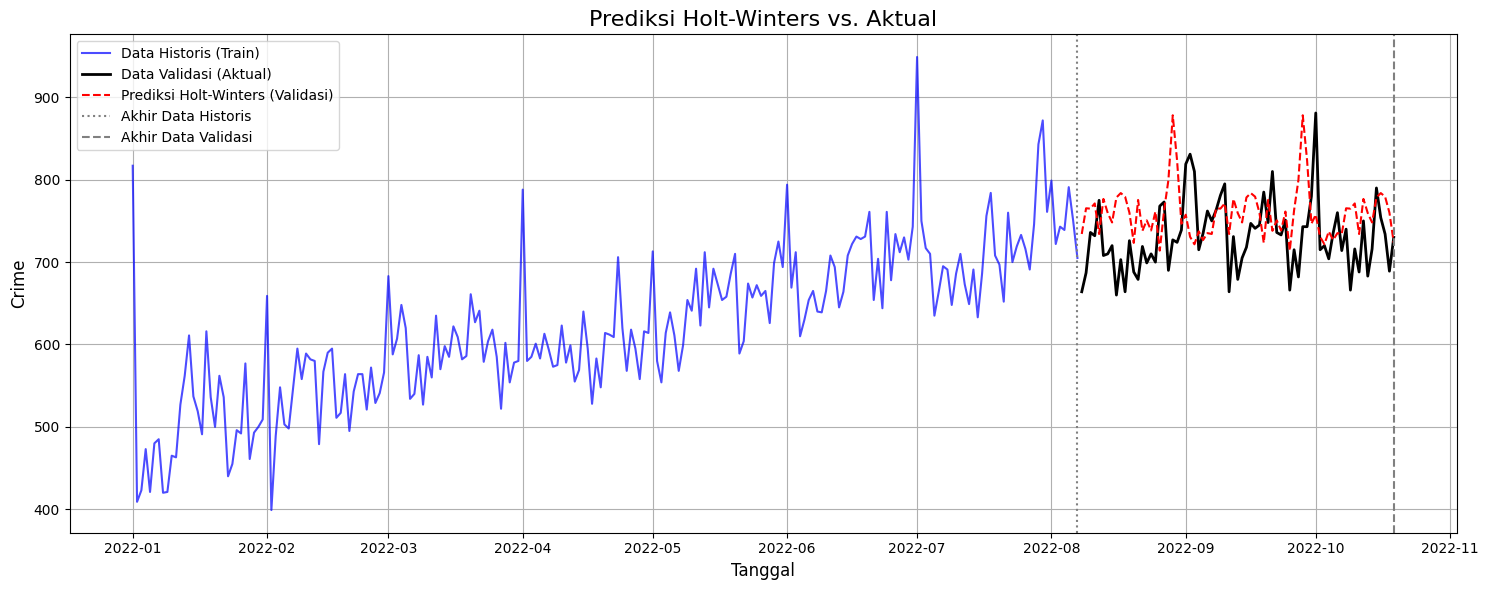

In [ ]:
# Pemodelan
hw_model = ExponentialSmoothing(y_train_ts, seasonal='multiplicative', seasonal_periods=30).fit() # latih model
y_pred_hw_val = hw_model.forecast(len(y_val_ts)) # prediksi

rmse_hw_val, mae_hw_val, mape_hw_val = evaluate_model(y_val_ts, y_pred_hw_val, "Holt-Winters (Validation)")

# Calculate and print R-squared for Holt-Winters
r2_hw_val = r2_score(y_val_ts, y_pred_hw_val)
print(f"R-squared : {r2_hw_val:.4f}")

plot_predictions(y_train_ts, y_val_ts, None, y_pred_hw_val, None, "Holt-Winters")

## Random Forest Regressor

--- Random Forest Regressor (Validation) ---
RMSE: 39.5186
MAE: 31.6037
MAPE: 4.27%
R-squared : 0.1423


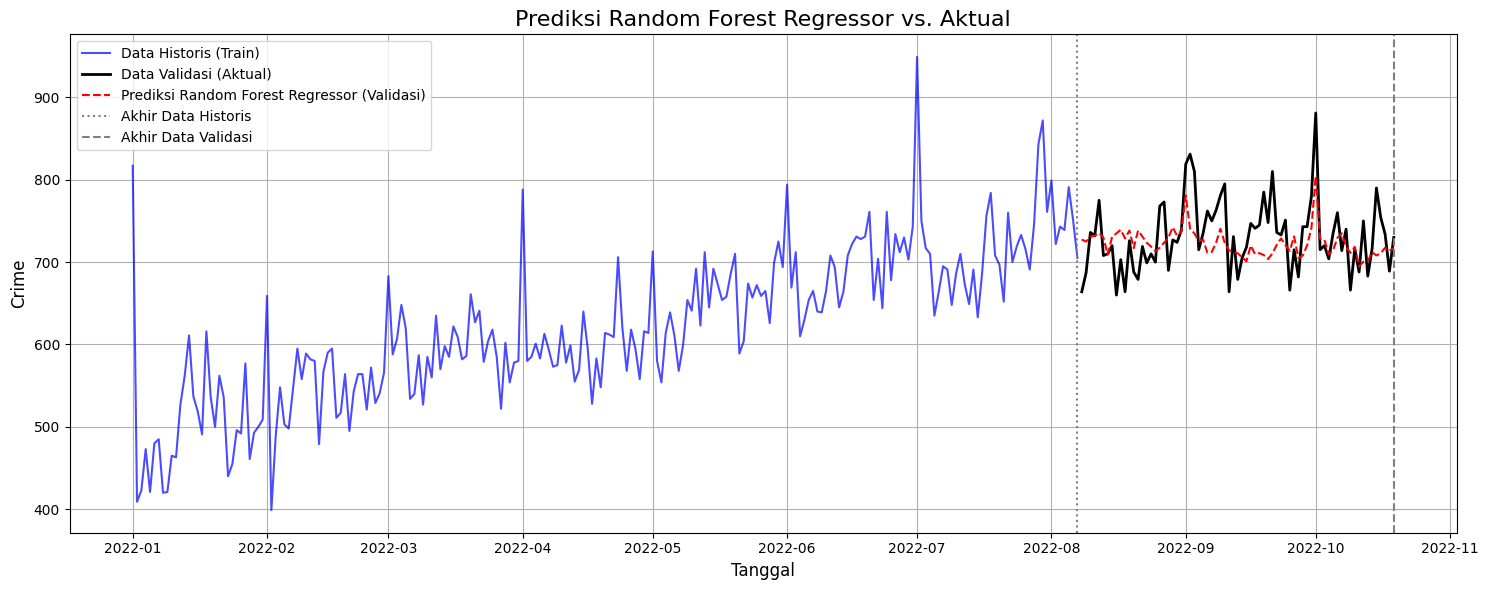

In [ ]:
# Pemodelan

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_ml, y_train_ml)

y_pred_rf_val = rf_model.predict(X_val_ml)

rmse_rf_val, mae_rf_val, mape_rf_val = evaluate_model(y_val_ml, y_pred_rf_val, "Random Forest Regressor (Validation)")

# Calculate and print R-squared for Random Forest
r2_rf_val = r2_score(y_val_ml, y_pred_rf_val)
print(f"R-squared : {r2_rf_val:.4f}")

plot_predictions(y_train_ml, y_val_ml, None, y_pred_rf_val, None, "Random Forest Regressor")

Evaluating the Best Model (Random Forest Regressor) on the Test Set:
--- Random Forest Regressor (Test) ---
RMSE: 65.9265
MAE: 49.0649
MAPE: 8.01%
R-squared (Random Forest Test): 0.5162


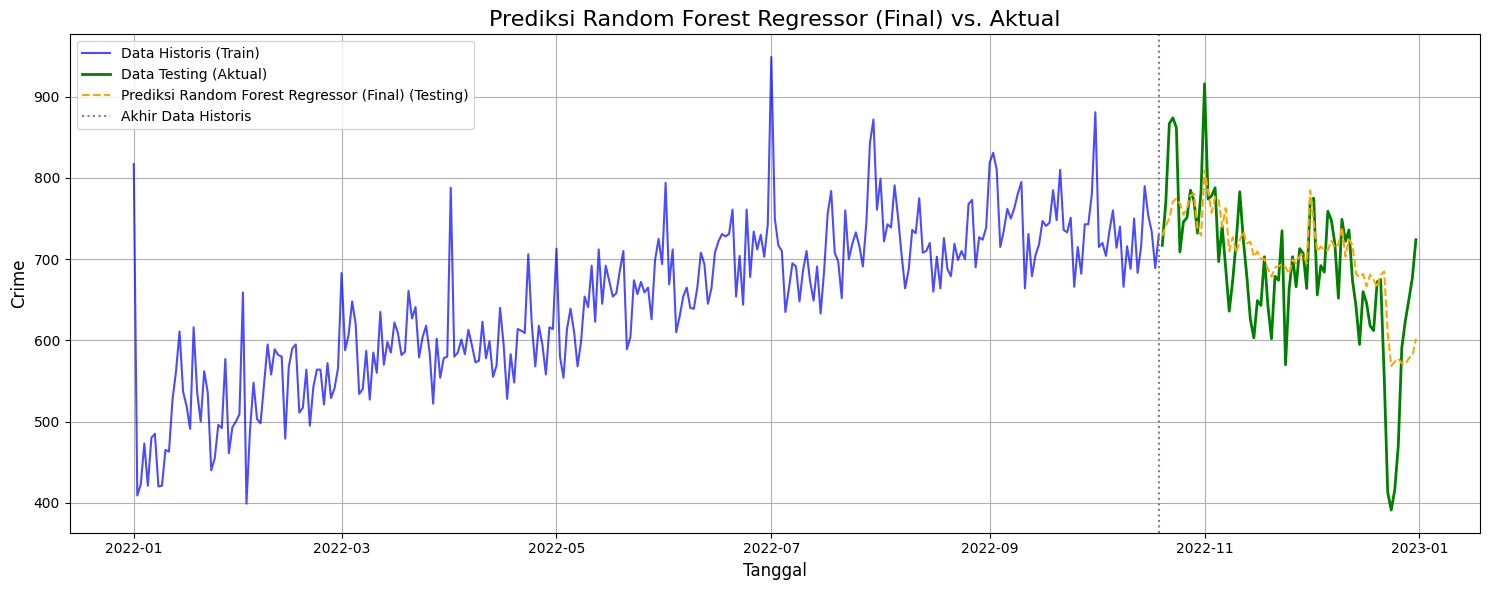

In [ ]:
#cuma latihan aja
best_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

X_train_val_ml = pd.concat([X_train_ml, X_val_ml])
y_train_val_ml = pd.concat([y_train_ml, y_val_ml])

best_model.fit(X_train_val_ml, y_train_val_ml)

y_pred_test_best_model = best_model.predict(X_test_ml)

print("Evaluating the Best Model (Random Forest Regressor) on the Test Set:")
rmse_test_best, mae_test_best, mape_test_best = evaluate_model(y_test_ml, y_pred_test_best_model, "Random Forest Regressor (Test)")

# Calculate and print R-squared for the best model on the test set
from sklearn.metrics import r2_score
r2_test_best = r2_score(y_test_ml, y_pred_test_best_model)
print(f"R-squared (Random Forest Test): {r2_test_best:.4f}")


plot_predictions(y_train_val_ml, None, y_test_ml, None, y_pred_test_best_model, "Random Forest Regressor (Final)")

## ARIMA


--- ARIMA (1,1,0) (Validation) ---
RMSE: 268.7280
MAE: 230.1518
MAPE: 31.18%
R-squared : -38.6595


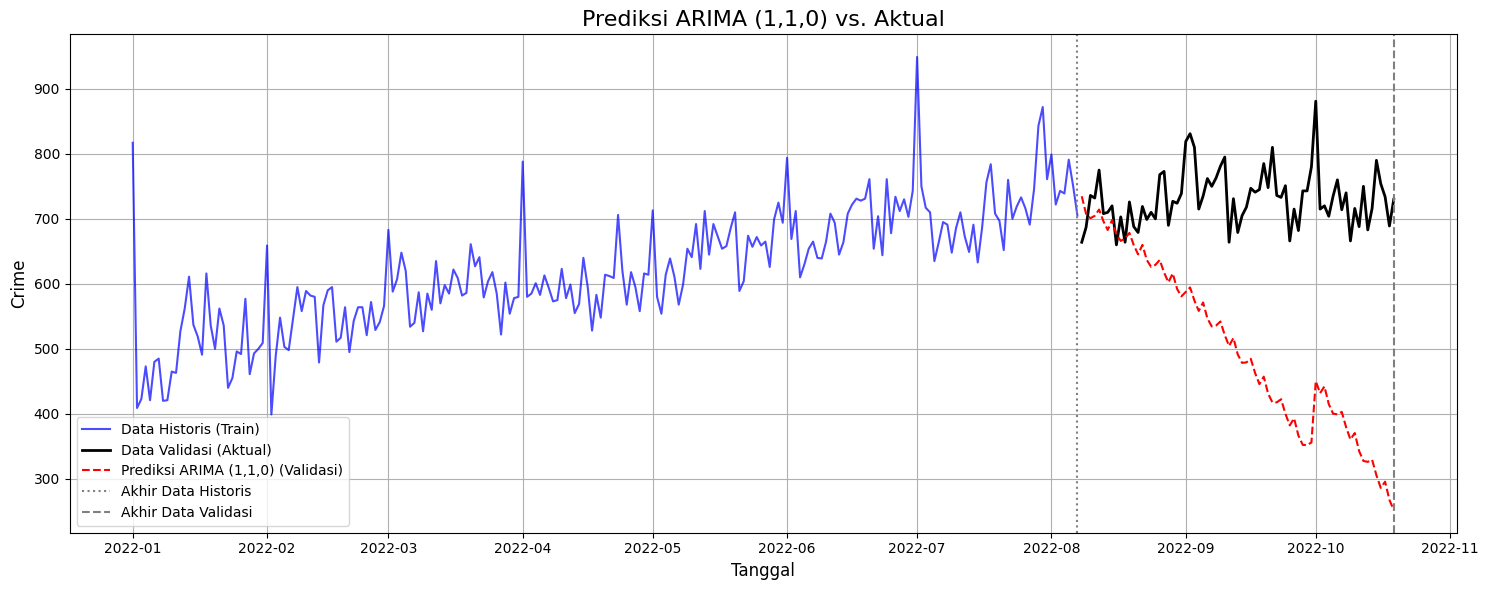

In [ ]:
# Pemodelan
arima_model = ARIMA(y_train_ts,
                      exog=exog_train_ts,
                      order=(1, 1, 0)).fit()

y_pred_arima_val = arima_model.forecast(steps=len(y_val_ts), exog=exog_val_ts)

rmse_arima_val, mae_arima_val, mape_arima_val = evaluate_model(y_val_ts, y_pred_arima_val, "ARIMA (1,1,0) (Validation)")

# Calculate and print R-squared for ARIMA
r2_arima_val = r2_score(y_val_ts, y_pred_arima_val)
print(f"R-squared : {r2_arima_val:.4f}")

plot_predictions(y_train_ts, y_val_ts, None, y_pred_arima_val, None, "ARIMA (1,1,0)")

**Insight** : Matriks penilaian terbaik ada di Random Forest. Semakin kecil nilainya maka semakin bagus, terkecuali pada bagian rsquare (semakin mendekati 1 semakin bagus).

- MAE (31.6837) lebih kecil dari RMSE (39.5186), ini menunjukkan bahwa Random Forest relatif konsisten dalam membuat kesalahan, dan tidak ada satu atau dua kesalahan prediksi yang sangat besar yang mendistorsi hasil.

- MAPE sebesar 4.27%, ini berarti rata-rata prediksi Random Forest meleset kurang dari 5% dari nilai aktualnya. Angka itu merupakan hasil yang sangat baik dan menunjukkan Random Forest memiliki akurasi yang tinggi secara relatif.

- Rsquare 0.1423 atau 14.3% artinya model hanya mampu menjelaskan sekitar 14% dari variasi yang ada dalam data. Jadi keseluruhannya Random Forest memiliki akurasi yang cukup baik tetapi kemampuan penjelasannya sangat lemah ditunjukkan oleh nilai rsquare yang jauh mendekati angka 1.
